In [1]:
import pandas as pd
dados2023 = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\2023\\dados_2023.xlsx')

## **.Verifica os 5 produtos mais vendidos de toda tabela** 

In [2]:

produtos_mais_vendidos = dados2023.groupby(['product_id', 'product_name'])['units_sold_kg'].sum().reset_index()

produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='units_sold_kg', ascending=False)

print(produtos_mais_vendidos.head(5)) 

                              product_id product_name  units_sold_kg
13  6c8adfc3-2114-4b78-a3e2-2269a6a0dc02         Milk        3062928
20  9bb2d8db-a7ac-4d40-9d3c-0c96cafe7153       Butter        3043271
10  4a0f8862-c851-4073-bc17-3a3d93834902         Beef        2968177
21  b12c721e-8301-4b08-8ac3-d435be9b8b32         Lamb        2888548
14  7ba3ccef-363a-40c5-9bbd-a451068846c5       Yogurt        2802611


## **.Busca em cada mês do ano a quantidade dos top 5 produtos mais vendidos**

In [3]:
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Adicionar a coluna de mês (1 para Janeiro, 2 para Fevereiro, etc.)
dados2023['month'] = dados2023['sale_date'].dt.month

# Obter os 5 produtos mais vendidos no ano inteiro
top_produtos_geral = (
    dados2023.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados para incluir apenas os produtos mais vendidos no ano inteiro
dados_top = dados2023[dados2023['product_name'].isin(top_produtos_geral)]

# Criar os dicionários para cada mês
dicionarios_meses = {}
for mes in range(1, 13):  # De Janeiro (1) a Dezembro (12)
    # Filtrar dados para o mês específico
    vendas_mes = (
        dados_top[dados_top['month'] == mes]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .sort_values(ascending=False)
        .head(5)  # Considerar apenas os 5 produtos mais vendidos no mês
        .to_dict()
    )
    dicionarios_meses[mes] = vendas_mes

# Exibir os dicionários criados
meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

for mes, dados in dicionarios_meses.items():
    print(f"{meses_nomes[mes]}:")
    print(dados)
    print()


Janeiro:
{'Yogurt': 261693, 'Lamb': 249312, 'Milk': 243440, 'Butter': 230633, 'Beef': 165160}

Fevereiro:
{'Butter': 322293, 'Milk': 320205, 'Yogurt': 278940, 'Beef': 261717, 'Lamb': 83678}

Março:
{'Yogurt': 258819, 'Beef': 228453, 'Lamb': 196012, 'Butter': 195595, 'Milk': 190051}

Abril:
{'Lamb': 286417, 'Milk': 253110, 'Butter': 241236, 'Yogurt': 196680, 'Beef': 170956}

Maio:
{'Butter': 346569, 'Lamb': 301242, 'Yogurt': 271451, 'Beef': 238625, 'Milk': 213774}

Junho:
{'Lamb': 499536, 'Butter': 277936, 'Milk': 268645, 'Beef': 266697, 'Yogurt': 238507}

Julho:
{'Butter': 285825, 'Milk': 275500, 'Lamb': 262982, 'Beef': 205116, 'Yogurt': 176745}

Agosto:
{'Beef': 313472, 'Butter': 289880, 'Milk': 233154, 'Yogurt': 207481, 'Lamb': 183003}

Setembro:
{'Beef': 302530, 'Milk': 272381, 'Yogurt': 265560, 'Butter': 166304, 'Lamb': 109670}

Outubro:
{'Lamb': 343550, 'Beef': 300772, 'Milk': 259092, 'Butter': 232043, 'Yogurt': 106804}

Novembro:
{'Yogurt': 372224, 'Beef': 295991, 'Milk': 286973,

## **.Plotagem de grafico com os valores vendidos de cada um dos top 5 produtos ao longo do ano**

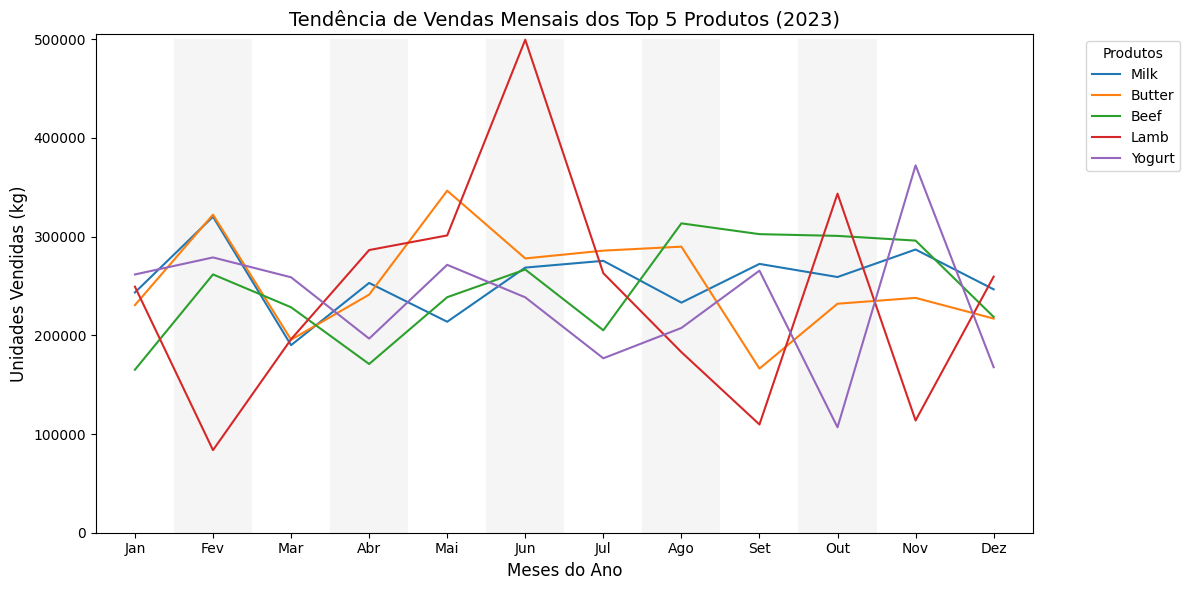

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Adicionar a coluna de mês
dados2023['month'] = dados2023['sale_date'].dt.month

# Obter os 5 produtos mais vendidos no ano inteiro
top_produtos_geral = (
    dados2023.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados para incluir apenas os produtos mais vendidos no ano inteiro
dados_top = dados2023[dados2023['product_name'].isin(top_produtos_geral)]

# Criar os dicionários para cada mês
dicionarios_meses = {}
for mes in range(1, 13):
    vendas_mes = (
        dados_top[dados_top['month'] == mes]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .to_dict()
    )
    dicionarios_meses[mes] = vendas_mes

# Preparar os dados para o gráfico
meses = list(range(1, 13))
produtos = list(top_produtos_geral)
valores_por_mes = {
    produto: [dicionarios_meses.get(mes, {}).get(produto, 0) for mes in meses]
    for produto in produtos
}

# Ajustar o limite superior do eixo Y
limite_superior_y = 500000

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado (branco e cinza claro) para os meses
for i in range(len(meses)):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.add_patch(
        patches.Rectangle(
            (i - 0.5, 0),  # Posição inicial da barra
            1,             # Largura da barra
            limite_superior_y,  # Altura da barra ajustada ao novo limite superior
            color=cor,
            zorder=0
        )
    )

# Adicionar as linhas para cada produto
for produto, valores in valores_por_mes.items():
    ax.plot(meses, valores, label=produto)

# Configurar os eixos
ax.set_xticks(meses)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Unidades Vendidas (kg)', fontsize=12)
ax.set_title('Tendência de Vendas Mensais dos Top 5 Produtos (2023)', fontsize=14)

# Ajustar os limites dos eixos
ax.set_ylim(0, limite_superior_y * 1.01)  # Ajustar o limite superior do eixo Y
ax.set_xlim(0.5, 12.5)

# Adicionar a grade
ax.grid(False)  # Desativar a grade

# Adicionar legenda
ax.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## **.Verificando a quantidade dos top 5 produtos por estação do ano**

In [5]:
import pandas as pd

dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Determinar as estações com base na coluna 'sale_date'
def get_season(month):
    if month in [3, 4, 5]:  # Março, Abril, Maio -> Primavera
        return 'Primavera'
    elif month in [6, 7, 8]:  # Junho, Julho, Agosto -> Verão
        return 'Verao'
    elif month in [9, 10, 11]:  # Setembro, Outubro, Novembro -> Outono
        return 'Outono'
    else:  # Dezembro, Janeiro, Fevereiro -> Inverno
        return 'Inverno'

# Adicionar a estação como uma nova coluna
dados2023['season'] = dados2023['sale_date'].dt.month.apply(get_season)

# Obter os 10 produtos mais vendidos no ano de 2022
top_produtos = (
    dados2023.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados apenas para os 10 produtos mais vendidos
dados_top = dados2023[dados2023['product_name'].isin(top_produtos)]

# Criar os dicionários para cada estação
dicionarios_estacoes = {}
for estacao in ['Primavera', 'Verao', 'Outono', 'Inverno']:
    # Agrupar por produto e calcular as vendas por estação
    vendas_estacao = (
        dados_top[dados_top['season'] == estacao]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .to_dict()
    )
    dicionarios_estacoes[estacao] = vendas_estacao

# Exibir os dicionários criados
for estacao, dados in dicionarios_estacoes.items():
    print(f"{estacao}:")
    print(dados)
    print()


Primavera:
{'Beef': 638034, 'Butter': 783400, 'Lamb': 783671, 'Milk': 656935, 'Yogurt': 726950}

Verao:
{'Beef': 785285, 'Butter': 853641, 'Lamb': 945521, 'Milk': 777299, 'Yogurt': 622733}

Outono:
{'Beef': 899293, 'Butter': 636306, 'Lamb': 566920, 'Milk': 818446, 'Yogurt': 744588}

Inverno:
{'Beef': 645565, 'Butter': 769924, 'Lamb': 592436, 'Milk': 810248, 'Yogurt': 708340}



## **.Plotagem de grafico com a quantidade dos top 5 produtos por estação do ano**

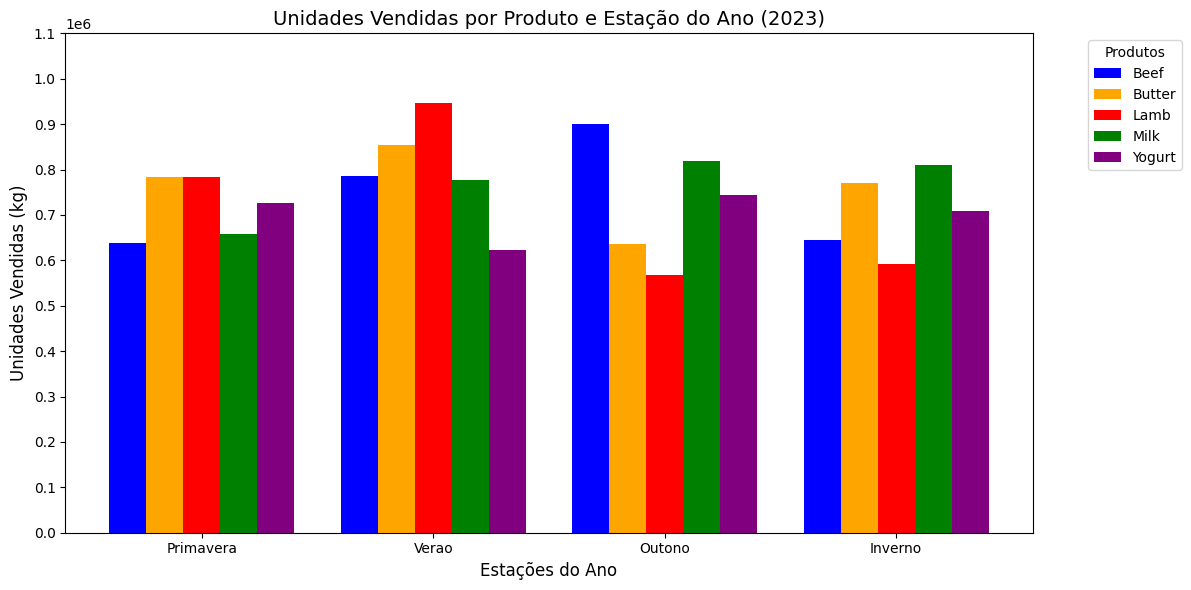

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico
estacoes = ['Primavera', 'Verao', 'Outono', 'Inverno']
produtos = list(dicionarios_estacoes['Primavera'].keys())
valores_por_estacao = [[dicionarios_estacoes[estacao].get(produto, 0) for produto in produtos] for estacao in estacoes]

# Mapeamento de cores para os produtos
cores_produtos = {
    'Beef': 'blue',
    'Butter': 'orange',
    'Milk': 'green',
    'Lamb': 'red',
    'Yogurt': 'purple',
}

# Configuração do gráfico
bar_width = 0.8 / len(produtos)  # Largura de cada barra (ajustado para caber no grupo)
x = np.arange(len(estacoes))  # Posições para as estações

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras ao gráfico
for i, produto in enumerate(produtos):
    valores = [valores_por_estacao[j][i] for j in range(len(estacoes))]
    cor = cores_produtos.get(produto, 'gray')  # Pega a cor definida, ou 'gray' se o produto não estiver no mapeamento
    ax.bar(x + i * bar_width, valores, bar_width, label=produto, color=cor)

# Configurar os eixos
ax.set_xlabel('Estações do Ano', fontsize=12)
ax.set_ylabel('Unidades Vendidas (kg)', fontsize=12)
ax.set_title('Unidades Vendidas por Produto e Estação do Ano (2023)', fontsize=14)
ax.set_xticks(x + bar_width * (len(produtos) - 1) / 2)
ax.set_xticklabels(estacoes)

# Ajustar a escala do eixo vertical para 100 mil em 100 mil até 2 milhões
ax.set_ylim(0, 1100000)
ax.set_yticks(range(0, 1200000, 100000))

# Adicionar legenda
ax.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\278762377.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


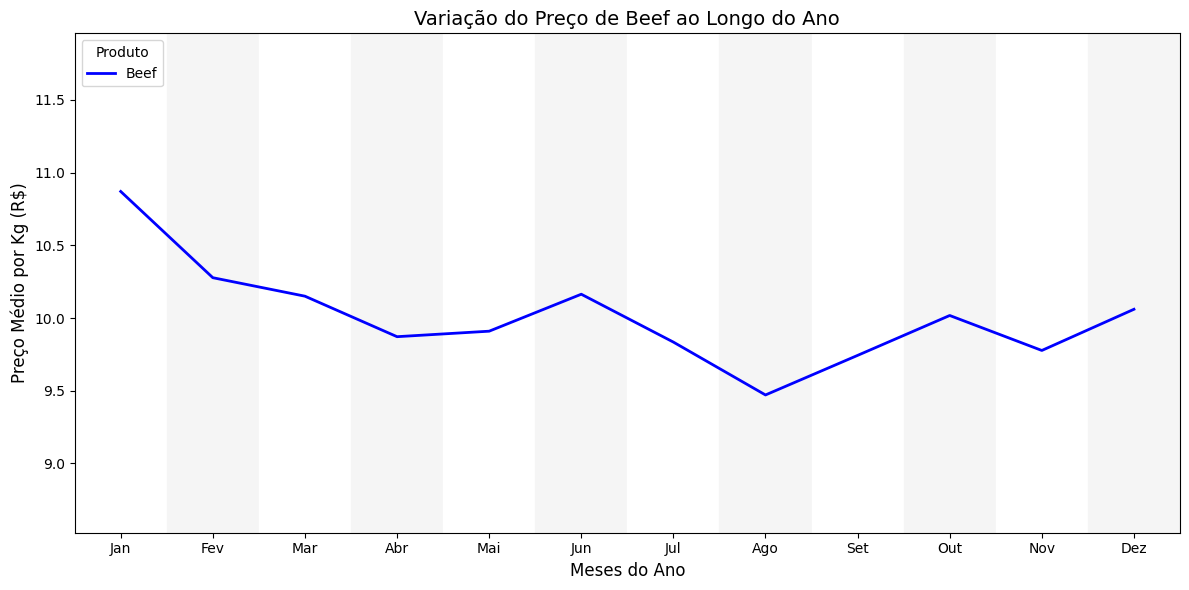

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Beef'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'blue'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\324876472.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


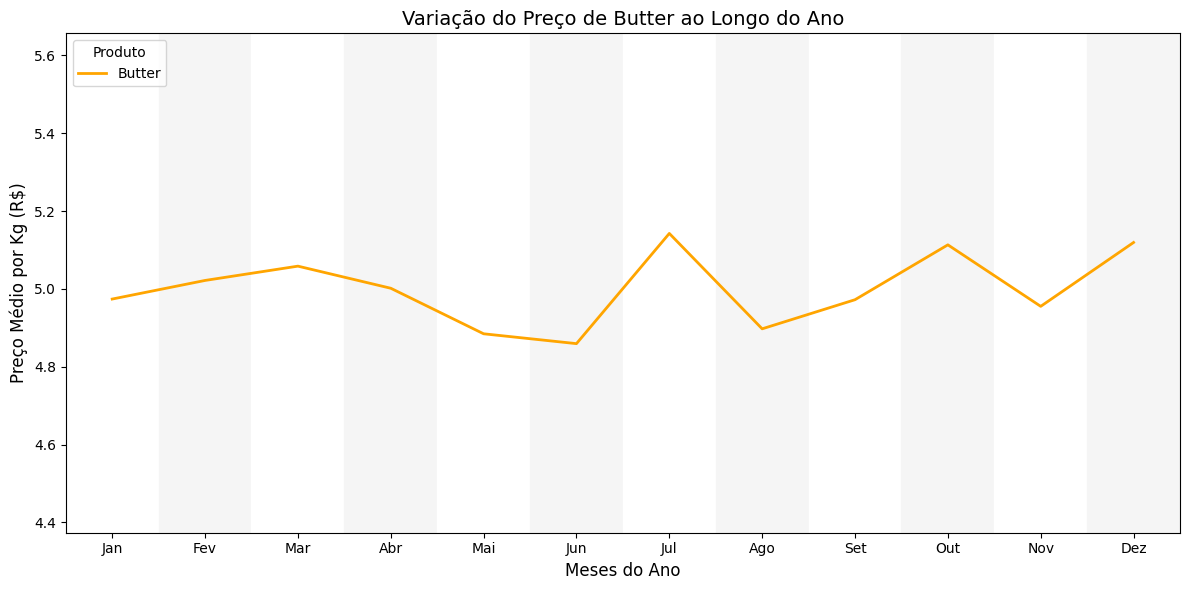

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Butter'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'orange'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\114409894.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


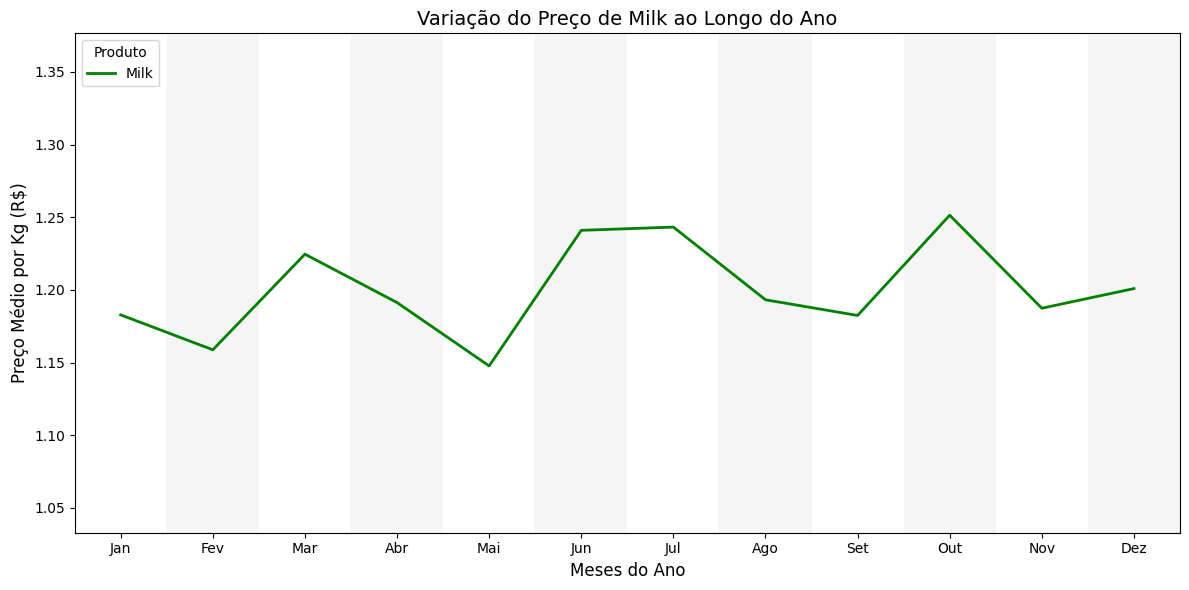

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Milk'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'green'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\280109743.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


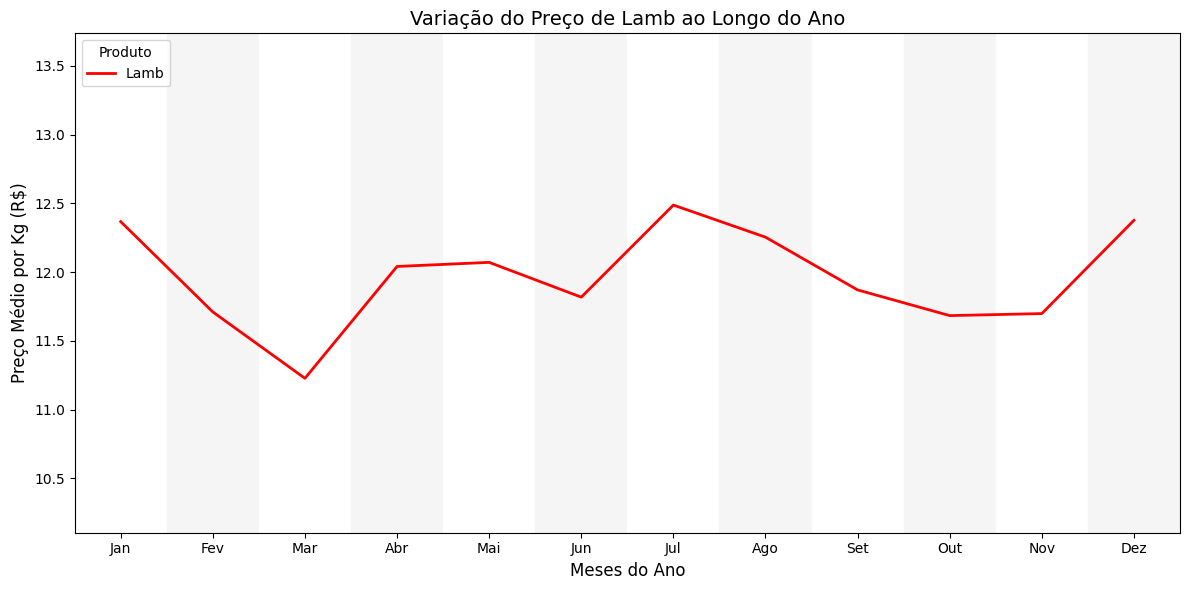

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Lamb'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'red'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


Por Estoque

C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\3376543710.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


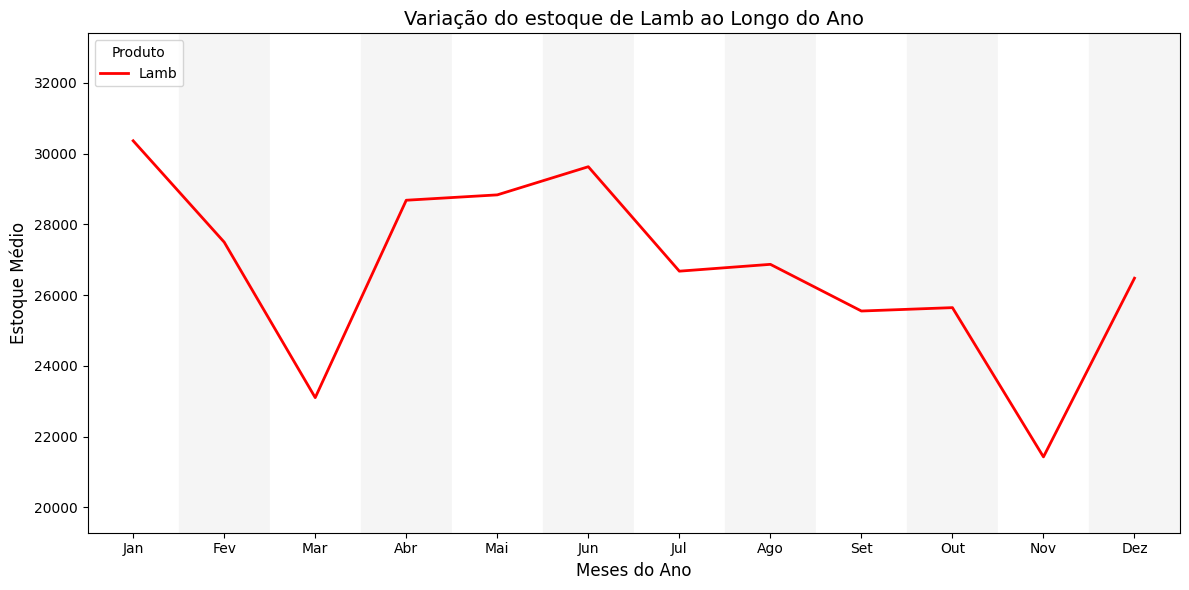

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Lamb'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'red'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['units_shipped_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Estoque Médio', fontsize=12)
ax.set_title(f'Variação do estoque de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\1665149692.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


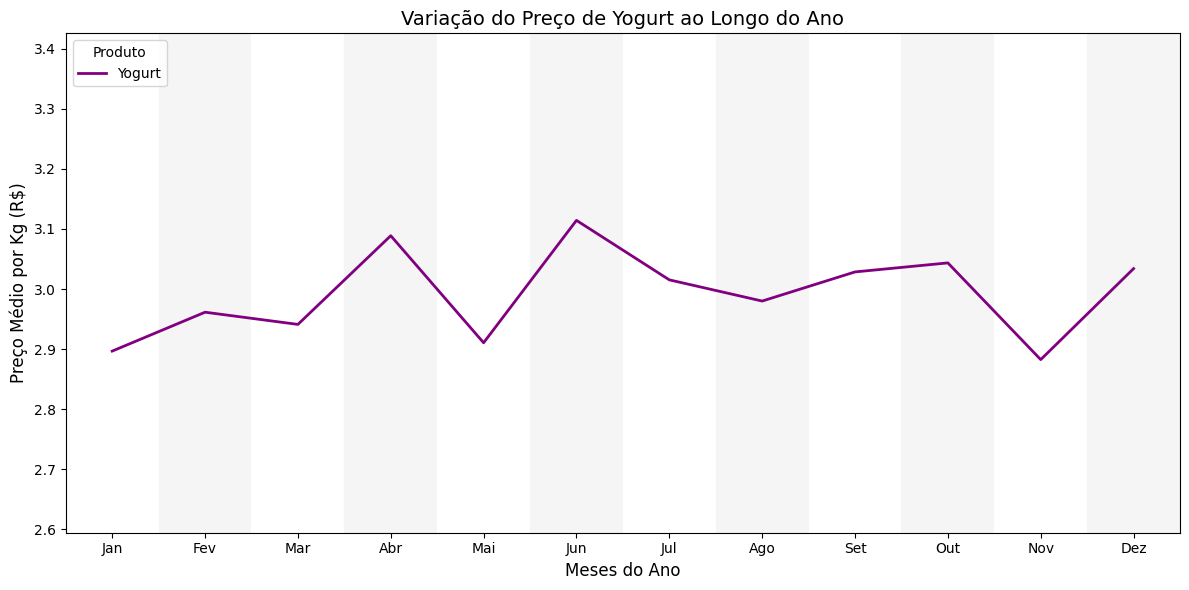

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Yogurt'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'purple'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

# ***Verificação de media de preço dos produtos mais vendidos GERAL***

In [13]:
import pandas as pd

# Filtrar os produtos desejados
products = ['Cheese', 'Beef', 'Lamb', 'Chicken', 'Butter', 'Milk', 'Yogurt']
filtered_df = dados2023[dados2023['product_name'].isin(products)]

# Calcular o preço médio por produto
average_price = filtered_df.groupby('product_name')['price_per_kg'].mean()

# Exibir o resultado
print(average_price)


product_name
Beef        9.982685
Butter      4.999178
Cheese      7.996098
Chicken     3.005022
Lamb       11.974900
Milk        1.200687
Yogurt      2.992532
Name: price_per_kg, dtype: float64


# ***Variação de preço Cheese e Chicken em 2023***

C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\2252405976.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


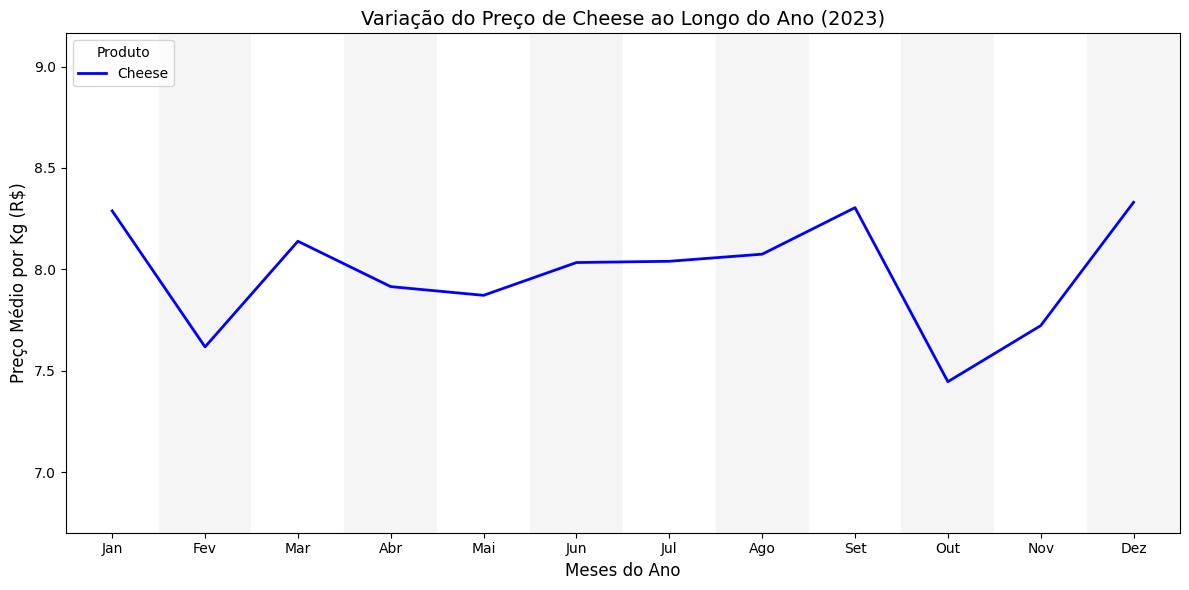

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Cheese'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'blue'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano (2023)', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

C:\Users\enzov\AppData\Local\Temp\ipykernel_2992\2996378865.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


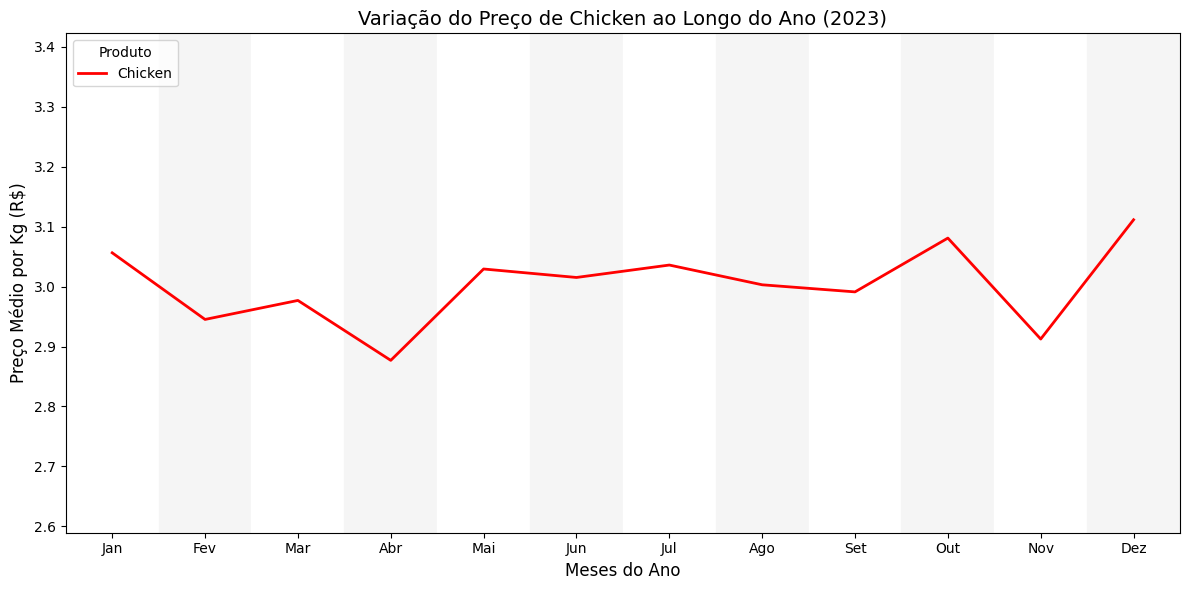

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2023['sale_date'] = pd.to_datetime(dados2023['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Chicken'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'red'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2023[dados2023['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano (2023)', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()